# A Tour of Machine Learning Classifiers Using Scikit-Learn


- DGM : 파트 1 - 파이썬 머신러닝[3]
- 발표자 : 정권우

참고:
- [1] Python Machine Learning by Sebastian Raschka
- [2] Homepage of Sebastian Raschka (http://sebastianraschka.com/)

-------------------------------------------------------------------------

# Contents
- Introduction to concepts of popular classification algorithms
- Using scikit-learn machine learning library
- Questions to ask when selecting a machine learning algorithm

-------------------------------------------------------------------------

## Choosing a classification algorithm

<div align="center">
   <img src="http://scikit-learn.org/stable/_static/ml_map.png">
</div>

1. Selection of features
2. Choosing a performance metric
3. Choosing a classifier and optimization algorithm
4. Evaluating the performance of the model
5. Tuning the algorithm

In [1]:
## load iris data
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print "="*50
print "Iris dataset shape:"
print "    (X {}) (y {})\n".format(X.shape, y.shape)

Iris dataset shape:
    (X (150, 2)) (y (150,))



In [2]:
## split train/test data
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print "="*50
print "Split Result:"
print "    X_train : {} y_train : {}".format(X_train.shape, y_train.shape)
print "    X_test : {} y_test : {}\n".format(X_test.shape, y_test.shape)

Split Result:
    X_train : (105, 2) y_train : (105,)
    X_test : (45, 2) y_test : (45,)



/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<div align="center">
   <img src="http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png">
</div>

In [3]:
## standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print "="*50
print "Standard Scaling:"
print "    Pre-Scaling : \n", X_train[:3]
print "    Post-Scaling : \n{}\n".format(X_train_std[:3])

Standard Scaling:
    Pre-Scaling : 
[[ 3.5  1. ]
 [ 5.5  1.8]
 [ 5.7  2.5]]
    Post-Scaling : 
[[-0.18295039 -0.29145882]
 [ 0.93066067  0.73721938]
 [ 1.04202177  1.6373128 ]]



In [4]:
## Perceptron algorithm
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.01, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
mis_samples = (y_test!=y_pred).sum()
print "="*50
print "Misclassified samples: {}".format(mis_samples)
print "Accuracy : 1 - {}/{} = {}\n".format(mis_samples, X_test_std.shape[0], 1 - 1.*mis_samples/X_test_std.shape[0])

Misclassified samples: 4
Accuracy : 1 - 4/45 = 0.911111111111



/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


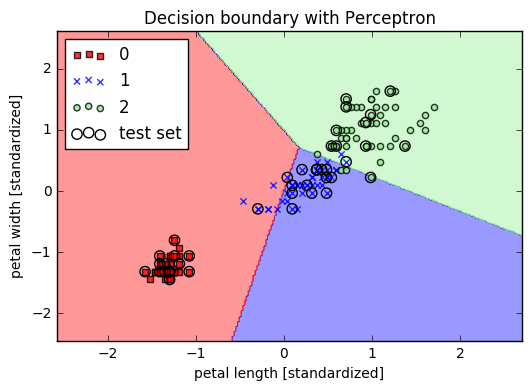

Note: Not Linearly Separable


In [5]:
## Decision Regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], \
                    alpha=0.8, c=cmap(idx), \
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', \
                    alpha=1.0, linewidths=1, marker='o', \
                    s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, \
                      y=y_combined, \
                      classifier=ppn, \
                      test_idx=range(105,150))
plt.title('Decision boundary with Perceptron')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

print "Note: Not Linearly Separable"

-------------------------------------------------------------------------

## Logistic Regression

- probability of positive event, p
- odds ratio(승산비), p/(1-p)
- logit function, log(p/(1-p))
- sigmoid function, 1/(1+1_exp(-z))

Sigmoid Function
<div align="center">
   <img src="http://sebastianraschka.com/images/faq/logisticregr-neuralnet/sigmoid.png">
</div>

Cost Function, J
<div align="center">
   <img src="http://www.holehouse.org/mlclass/07_Regularization_files/Image%20[5].png">
</div>

Cost for the classification of Logistic Regression
<div align="center">
   <img src="http://img.blog.csdn.net/20160501203235361">
</div>

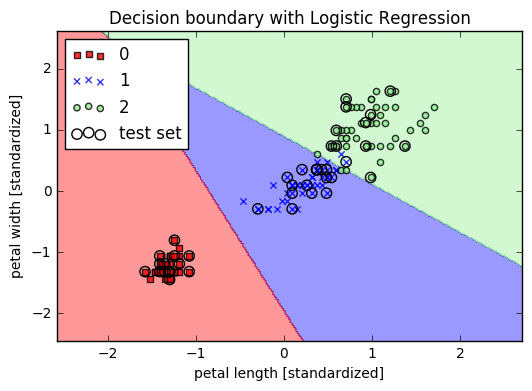

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, \
                      classifier=lr, test_idx=range(105,150))
plt.title('Decision boundary with Logistic Regression')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

-------------------------------------------------------------------------

## Tackling overfitting via regularization

Concept of Overfitting
<div align="center">
   <img src="http://image22.360doc.com/DownloadImg/2011/01/1612/8516559_17.jpg">
</div>
L1, L2 regularization
<div align="center">
   <img src="http://image.slidesharecdn.com/2015-06large-scalelassoandelastic-netregularizedgeneralizedlinearmodelsatsparksummit-150616205501-lva1-app6891/95/20150615-largescale-elasticnet-regularized-generalized-linear-models-at-spark-summit-2015-18-638.jpg?cb=1435297406">
</div>
*Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales.*

In Logistic Regression,
C = 1/lambda

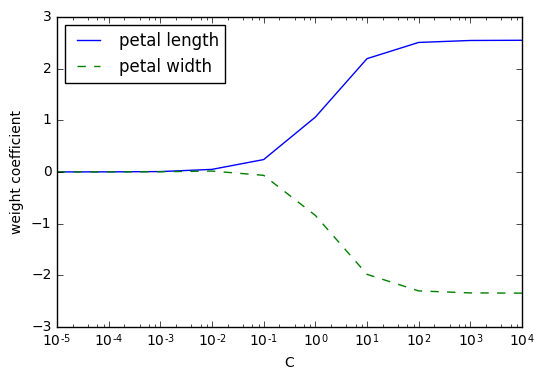

In [7]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

-------------------------------------------------------------------------

## Support Vector Machine
 - extension of perceptron
 - Maximum Margin Intuition
 <div align="center">
   <img src="https://www.safaribooksonline.com/library/view/python-real-world-data/9781786465160/graphics/3547_03_07.jpg">
</div>
 objective is to maximize the margin, a distance between the separating hyperplanes

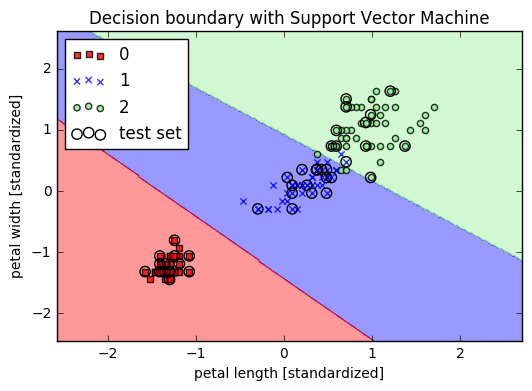

In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, \
                      classifier=svm, test_idx=range(105,150))
plt.title('Decision boundary with Support Vector Machine')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [9]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

-------------------------------------------------------------------------

## Solving nonlinear problems using a kernel SVM

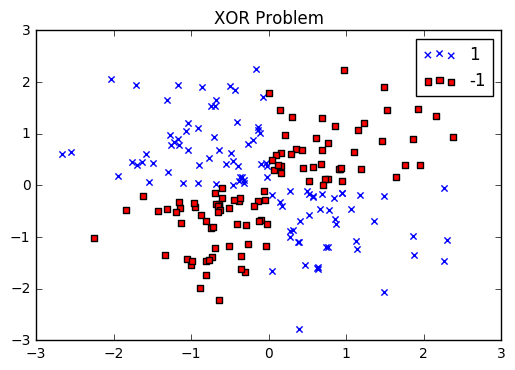

In [10]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor, 1,-1)

plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1],
            c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1],
            c='r', marker='s', label='-1')
plt.title("XOR Problem")
plt.ylim(-3.0)
plt.legend()
plt.show()

Linear hyperplane in kernel trasnformed dimension leads to a Nonlinear decision boundary 
<div align="center">
   <img src="http://sebastianraschka.com/images/faq/select_svm_kernels/5.png">
</div>

Radial Basis Function kernel (RBF kernel)
 - Gaussian kernel
 - interpreted as a similarity function between a pair of samples
 - [0,1] where 0 = dissimilar, 1 = similar
<div align="center">
   <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/72e3c5b92a3d0a07b20f123a93ed63900c1afb8d">
</div>

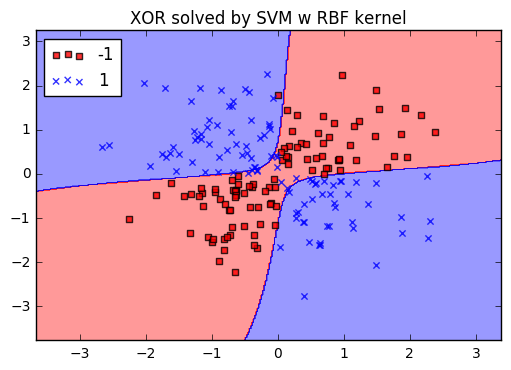

In [11]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.title("XOR solved by SVM w RBF kernel")
plt.legend(loc='upper left')
plt.show()

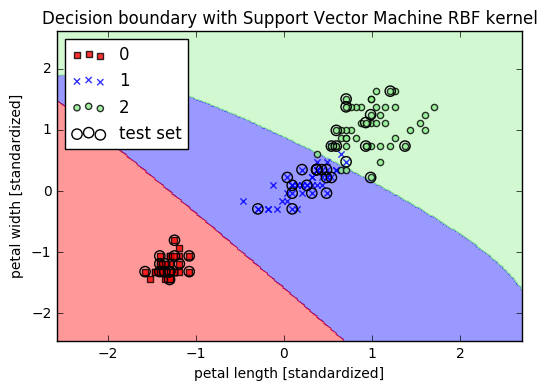

In [12]:
svm = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, \
                      classifier=svm, test_idx=range(105,150))
plt.title('Decision boundary with Support Vector Machine RBF kernel')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

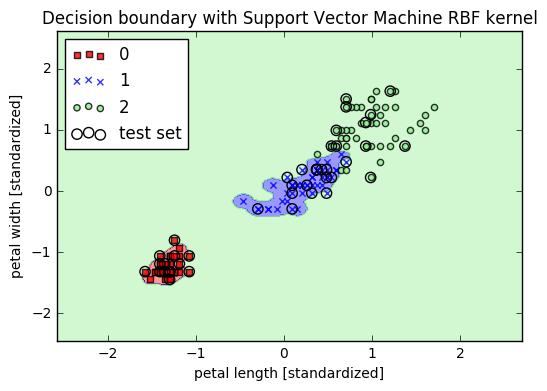

In [13]:
# Increasing gamma to 100.0
svm = SVC(kernel='rbf', C=1.0, gamma=100.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, \
                      classifier=svm, test_idx=range(105,150))
plt.title('Decision boundary with Support Vector Machine RBF kernel')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Because, gamma = 1/(2*sigma^2) in rbf kernel, changing gamma changes cut-off value for Gaussian sphere

-------------------------------------------------------------------------

## Decision Tree Learning

 - Decision tree in visual
<div align="center">
   <img src="http://pubs.rsc.org/services/images/RSCpubs.ePlatform.Service.FreeContent.ImageService.svc/ImageService/Articleimage/2009/MB/b907946g/b907946g-f2.gif">
</div>
 - In order to split the nodes at the most informative features, we define an objective function that we want to optimize via the tree learning algorithm
 - Information Gain
<div align="center">
   <img src="https://qph.ec.quoracdn.net/main-qimg-7bda374b64f609d00718504465823370?convert_to_webp=true">
</div>

 - Measure of Impurity
   - Entropy
<div align="center">
   <img src="img/Entropy.png">
</div>
   - Gini Index
<div align="center">
   <img src="img/Gini.png">
</div>
   - Classification Error
<div align="center">
   <img src="img/Classification_error.png">
</div>
<div align="center">
   <img src="https://qph.ec.quoracdn.net/main-qimg-b180b14b60e27aac16d7db3a0ecbd717?convert_to_webp=true">
</div>

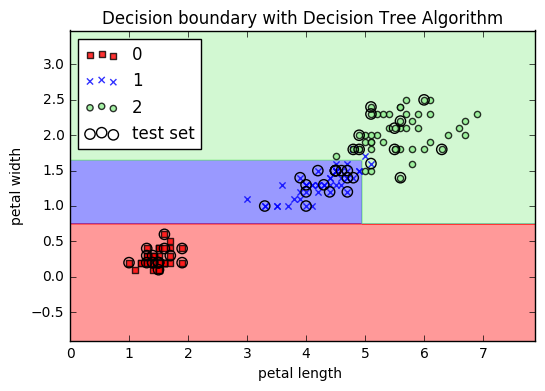

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# no standard scaler needed
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, \
                      classifier=tree, test_idx=range(105,150))
plt.title('Decision boundary with Decision Tree Algorithm')
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

-------------------------------------------------------------------------

## Random Forests : combining weak to strong learners
  - Huge popularity in machine learning due to their good classification performance, scalability and ease of use.
  - Ensemble of Decision Trees
  - Idea: combine weak learners to build a more robust model, a strong learner, that has better generalization error and less susceptible to overfitting
  - Basic steps
    1. Draw a random bootstrap sample of size n (randomly chosen with replacement)
    2. Grow a decision tree from the bootstrap sample. At each node:
      1. Randomly select d features w/o replacement
      2. Fit decision tree
    3. Repeat step 1~2 for k times
    4. Aggregate the prediction by each tree to assign the class label by majority vote.

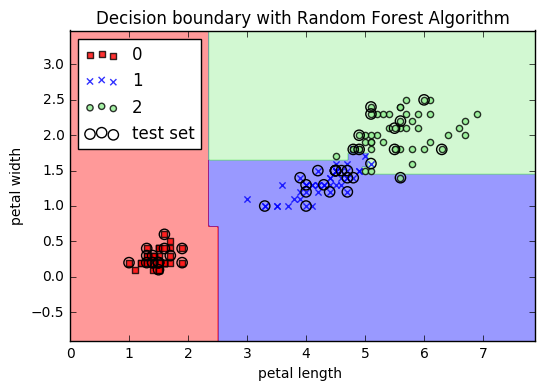

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
# no standard scaler needed
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, \
                      classifier=forest, test_idx=range(105,150))
plt.title('Decision boundary with Random Forest Algorithm')
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

-------------------------------------------------------------------------

## K-nearest neighbors - a lazy learning algorithm
 - KNN algorithm, fundamentally different learning algorithm (Non-parametric)
 - Learning steps
   1. Choose the number k and a distance metric
   2. Find the k nearest neighbors of the sample that we want to classify
   3. Assign the class label by majority vote
   
<div align="center">
   <img src="http://image.slidesharecdn.com/nextgentalk022015-150211154330-conversion-gate02/95/an-introduction-to-supervised-machine-learning-and-pattern-classification-the-big-picture-22-638.jpg?cb=1423785060">
</div>

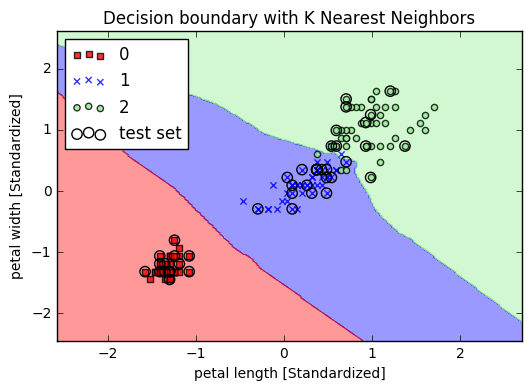

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, \
                      classifier=knn, test_idx=range(105,150))
plt.title('Decision boundary with K Nearest Neighbors')
plt.xlabel('petal length [Standardized]')
plt.ylabel('petal width [Standardized]')
plt.legend(loc='upper left')
plt.show()

-------------------------------------------------------------------------

## Summary
 - linear & non-linear machine learning algorithms
 - Decision trees are attractive if we care about interpretability
 - Logistic regression is useful model for online learning via sgd, predicts probability of particular event
 - Support Vectore Machine covers both linear & non-linear via kernel trick
 - Ensemble models don't require much hyperparameter and still perform well (random forest)
 - K Nearest neighbors is unique non-parametric learning, but computationally expensive
 
 - No Free Lunch Theorem 
   - "There is no UNIVERSAL algorithm that performs well on ALL problems"
 - No algorithm is good without informative and discriminatory features